In [49]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data set 

In [50]:
Ecomm_ds = pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')
Ecomm_ds.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


Information of the data set 

In [51]:
Ecomm_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


check the null values in the dataset


In [52]:
Ecomm_ds.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [53]:
Ecomm_ds.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


Lets check the Order date and Time 

In [54]:
Ecomm_ds['Order Date & Time']

0        19:29.5
1        54:29.5
2        21:29.5
3        19:29.5
4        49:29.5
          ...   
99995    49:29.5
99996    18:29.5
99997    27:29.5
99998    14:29.5
99999    41:29.5
Name: Order Date & Time, Length: 100000, dtype: object

lets convert into timestamp 

In [55]:
from datetime import datetime
import pandas as pd

def convert_custom_time(time_str):
    try:
       
        parts = time_str.split(":")
        hours = int(parts[0])
        
        minute_str, sec_frac_str = parts[1].split(".")
        minutes = int(minute_str)
        sec_frac = float("0." + sec_frac_str)
        
       
        seconds = int(sec_frac * 60)
        microsecond = int(((sec_frac * 60) - seconds) * 1_000_000)
        
      
        return datetime.strptime(f"{hours:02d}:{minutes:02d}:{seconds:02d}", "%H:%M:%S").replace(microsecond=microsecond)
    
    except Exception as e:
        return pd.NaT

Ecomm_ds['Order Date & Time'] = Ecomm_ds['Order Date & Time'].apply(convert_custom_time)


In [56]:
type(Ecomm_ds['Order Date & Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
Ecomm_ds['Platform'].unique()

array(['JioMart', 'Blinkit', 'Swiggy Instamart'], dtype=object)

In [58]:
Ecomm_ds['Product Category'].unique()

array(['Fruits & Vegetables', 'Dairy', 'Beverages', 'Personal Care',
       'Grocery', 'Snacks'], dtype=object)

In [59]:
Ecomm_ds['Refund Requested'].value_counts()

Refund Requested
No     54181
Yes    45819
Name: count, dtype: int64

In [60]:
Ecomm_ds['Service Rating'].unique()

array([5, 2, 1, 4, 3])

In [61]:
Ecomm_ds['Service Rating'].value_counts()

Service Rating
5    38688
2    30552
1    15267
4     7789
3     7704
Name: count, dtype: int64

In [62]:
Ecomm_ds.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,1900-01-01 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,NaT,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,1900-01-01 21:29:30,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,1900-01-01 19:29:30,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,NaT,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [63]:
Ecomm_ds['Order Date & Time'].isnull().sum()

np.int64(60089)

In [64]:
Ecomm_ds['Order Date & Time'] = Ecomm_ds['Order Date & Time'].fillna("Not Available")

In [65]:
Ecomm_ds['Order Date & Time'].value_counts()

Order Date & Time
Not Available          60089
1900-01-01 19:29:30     1732
1900-01-01 21:29:30     1721
1900-01-01 02:29:30     1719
1900-01-01 11:29:30     1709
1900-01-01 10:29:30     1709
1900-01-01 00:29:30     1699
1900-01-01 17:29:30     1692
1900-01-01 01:29:30     1683
1900-01-01 08:29:30     1679
1900-01-01 23:29:30     1676
1900-01-01 22:29:30     1669
1900-01-01 18:29:30     1667
1900-01-01 12:29:30     1666
1900-01-01 06:29:30     1664
1900-01-01 09:29:30     1659
1900-01-01 04:29:30     1659
1900-01-01 03:29:30     1652
1900-01-01 13:29:30     1638
1900-01-01 20:29:30     1636
1900-01-01 05:29:30     1624
1900-01-01 16:29:30     1613
1900-01-01 15:29:30     1590
1900-01-01 14:29:30     1588
1900-01-01 07:29:30     1567
Name: count, dtype: int64

In [66]:
Ecomm_ds.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,1900-01-01 19:29:30,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,Not Available,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,1900-01-01 21:29:30,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,1900-01-01 19:29:30,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,Not Available,30,Beverages,334,"Fast delivery, great service!",5,No,No


# Data Visualization 

1. Which Platform are used most for the cases ????

In [67]:
platform  =  Ecomm_ds['Platform'].value_counts().reset_index()
platform.columns = ['Platform', 'Count']
platform


,Platform,Count
0,Swiggy Instamart,33449
1,Blinkit,33424
2,JioMart,33127


In [68]:
Ecomm_ds['Platform'].unique()

array(['JioMart', 'Blinkit', 'Swiggy Instamart'], dtype=object)

In [69]:
def platform(plat):
    if plat == "Swiggy Instamart":
        return 3
    elif plat == "Blinkit":
        return 2 
    elif plat == "JioMart":
        return 1

In [70]:
Ecomm_ds['Platform_numeric'] = Ecomm_ds['Platform'].apply(platform)

In [71]:
Ecomm_ds['Platform_numeric'].unique()

array([1, 2, 3])

In [72]:
sns.barplot(data = platform , x = 'Platform' , y = 'Count' , palette= 'rainbow' )
plt.title("The most platform are used " , fontsize = 14 , fontweight = 'bold')

for index, row in platform.iterrows():
    plt.text(index, row['Count'] + 100, row['Count'], ha='center', va='bottom', fontsize=10)

TypeError: Data source must be a DataFrame or Mapping, not <class 'function'>.

According to this visualization the most Swiggy instamart are used for delivery 

 2 .Most service rating 

In [ ]:
Rating = Ecomm_ds['Service Rating'].value_counts().reset_index()
Rating.columns = ['rating','count']
Rating

,rating,count
0,5,38688
1,2,30552
2,1,15267
3,4,7789
4,3,7704


C:\Users\ragha\AppData\Local\Temp\ipykernel_19796\301080135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Rating , x = 'rating', y = 'count' , palette= 'Set2' )


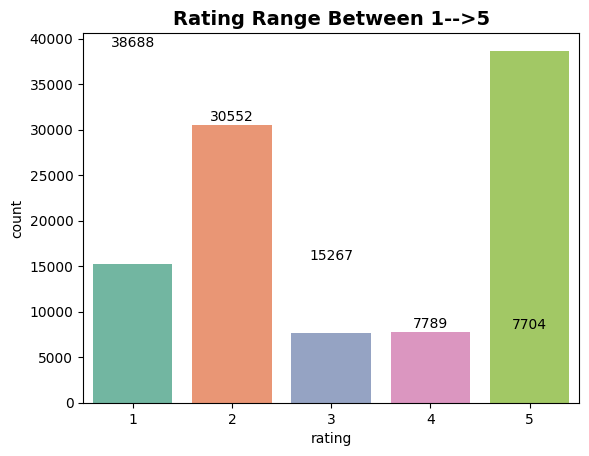

In [ ]:
sns.barplot(data=Rating , x = 'rating', y = 'count' , palette= 'Set2' ) 

plt.title("Rating Range Between 1-->5" , fontsize = 14 , fontweight = 'bold')
for index, row in Rating.iterrows():
    plt.text(index, row['count'] + 100, row['count'], ha='center', va='bottom', fontsize=10)
    

The most rating is 5 

3. Delivery Delay 

In [ ]:
Delay  =Ecomm_ds['Delivery Delay'].value_counts()

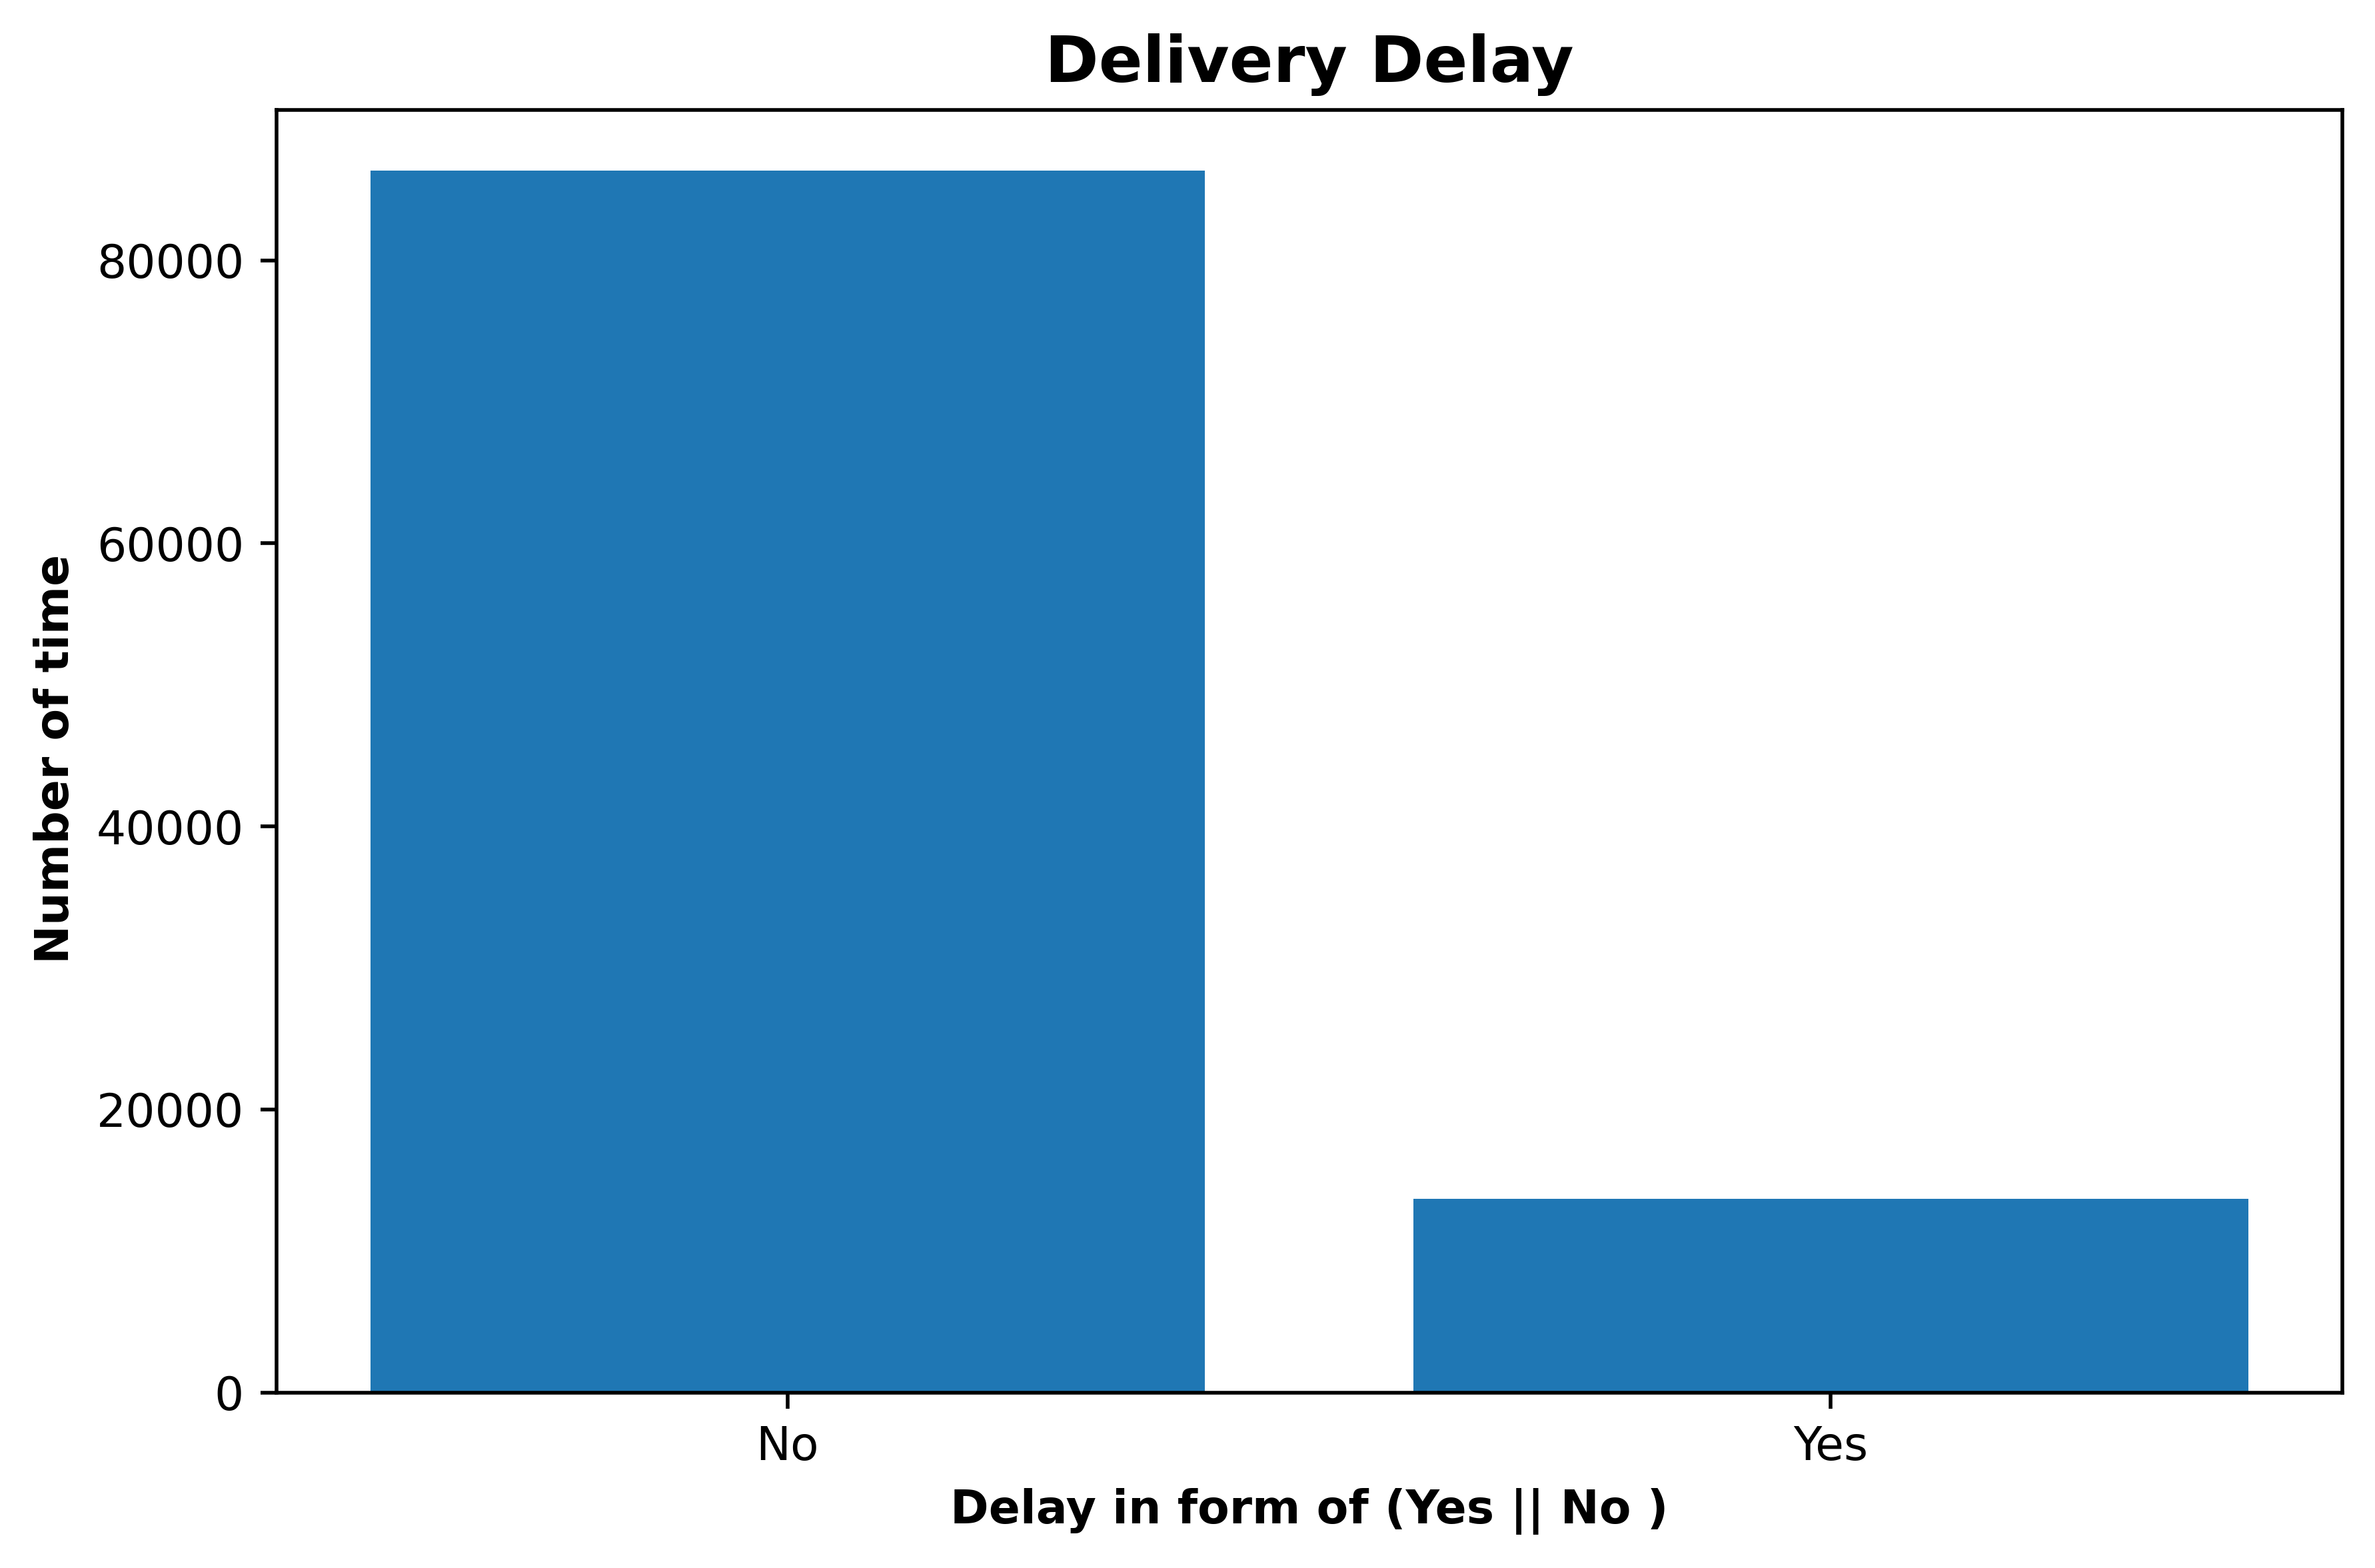

In [ ]:
plt.figure(figsize=(8,5 ), dpi = 500)
plt.bar(x = Delay.index , height= Delay.values )
plt.title("Delivery Delay", fontsize = 14, fontweight  = 'bold')
plt.xlabel("Delay in form of (Yes || No )" , fontweight = 'bold')
plt.ylabel("Number of time " , fontweight = 'bold')
plt.show()

4. Maximum product categories selling 

In [ ]:
Ecomm_ds['Product Category'].unique()

array(['Fruits & Vegetables', 'Dairy', 'Beverages', 'Personal Care',
       'Grocery', 'Snacks'], dtype=object)

In [ ]:
Product_catagories  = Ecomm_ds['Product Category'].value_counts().reset_index()
Product_catagories.columns = ['product','count']
Product_catagories

,product,count
0,Dairy,16857
1,Grocery,16737
2,Snacks,16705
3,Fruits & Vegetables,16632
4,Beverages,16536
5,Personal Care,16533


C:\Users\ragha\AppData\Local\Temp\ipykernel_19796\3513998014.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = Product_catagories.index, y = Product_catagories.values , palette='Set2' )


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Grocery'),
  Text(2, 0, 'Snacks'),
  Text(3, 0, 'Fruits & Vegetables'),
  Text(4, 0, 'Beverages'),
  Text(5, 0, 'Personal Care')])

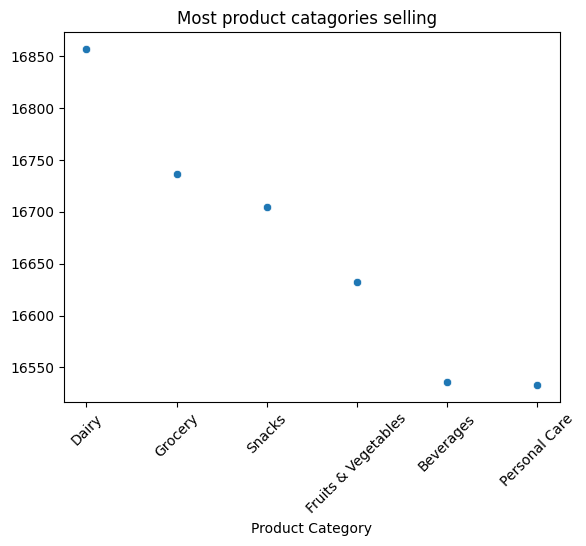

In [ ]:

sns.scatterplot(x = Product_catagories.index, y = Product_catagories.values , palette='Set2' )
plt.title("Most product catagories selling  ")
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Grocery'),
  Text(2, 0, 'Snacks'),
  Text(3, 0, 'Fruits & Vegetables'),
  Text(4, 0, 'Beverages'),
  Text(5, 0, 'Personal Care')])

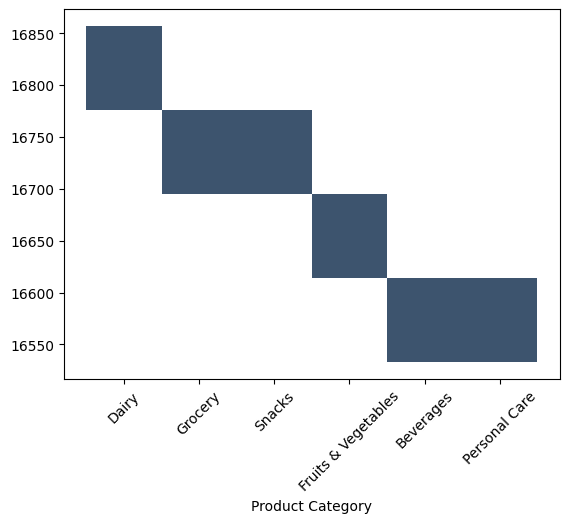

In [ ]:
sns.histplot(x = Product_catagories.index, y = Product_catagories.values ,  kde = True  )
plt.xticks(rotation = 45)


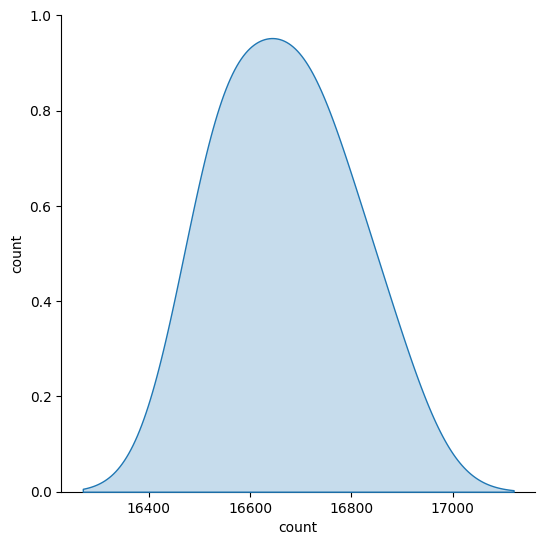

In [ ]:
sns.pairplot(Product_catagories, kind = 'kde',height= 5.5)

In [74]:
Ecomm_ds.to_csv("Ecommerence cleaned data.csv")